torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch: 1/2 step: 100/600  loss: 0.178032785654068
epoch: 1/2 step: 200/600  loss: 0.28257572650909424
epoch: 1/2 step: 300/600  loss: 0.21988384425640106
epoch: 1/2 step: 400/600  loss: 0.37143370509147644
epoch: 1/2 step: 500/600  loss: 0.23806239664554596
epoch: 1/2 step: 600/600  loss: 0.244205042719841
epoch: 2/2 step: 100/600  loss: 0.07377175986766815
epoch: 2/2 step: 200/600  loss: 0.11501447856426239
epoch: 2/2 step: 300/600  loss: 0.18674252927303314
epoch: 2/2 step: 400/600  loss: 0.2832748591899872
epoch: 2/2 step: 500/600  loss: 0.11526670306921005
epoch: 2/2 step: 600/600  loss: 0.2742407023906708
Accuracy: 95.23666666666666


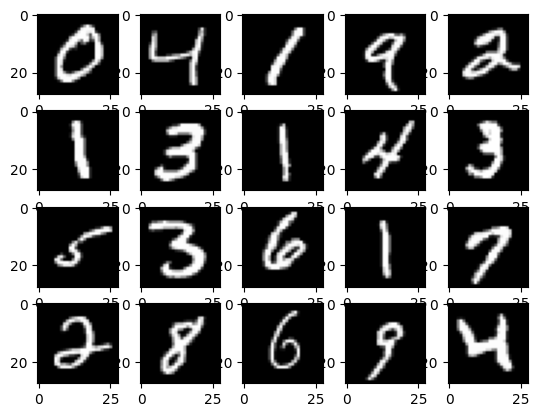

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
#hyper parameters
input_size=784 #28*28
hidden_size1=100
hidden_size2=100
num_classes=10
num_epocs=2
batch_size=100
learning_rate=0.01
#MNIST
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor())

test_dataset=torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=False)

test_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=False)
examples=iter(train_loader)
samples,label=next(examples)

print(samples.shape,label.shape) #[100,1,28,28] 100-batch_size;1--channel(no color channel) 28-pixel 
for i in range(20):
    plt.subplot(4,5,i+1) #2->rows 3->cols 
    plt.imshow(samples[i+1][0],cmap='gray')
class Neuralnet(nn.Module):
    def __init__(self,input_size,hidden_size1,hidden_size2,num_classes):
        super().__init__()# inheritance from nn.Module-->parent class
        self.l1=nn.Linear(input_size,hidden_size1)
        self.relu1=nn.ReLU()
        self.l2=nn.Linear(hidden_size1,hidden_size2)
        self.relu2=nn.ReLU()
        self.l3=nn.Linear(hidden_size2,num_classes)
    def forward(self,x):
        out=self.l1(x)
        out=self.relu1(out)#aCTIVATION FXN
        out=self.l2(out)
        out=self.relu2(out)#ACTIVATION FXN
        out=self.l3(out)
        return out
model=Neuralnet(input_size,hidden_size1,hidden_size2,num_classes)

#loss and optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

#training loop for model
n_total_steps=len(train_loader)
for epoch in range(num_epocs):
    for i,(images,labels) in enumerate(train_loader):
        images=images.reshape(-1,28*28)
        
        #forward-->prediction
        outputs=model(images)
        loss=criterion(outputs,labels)

        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(i+1)%100==0:
            print('epoch: '+str(epoch+1)+'/'+str(num_epocs)+' step: '+str(i+1)+'/'+str(n_total_steps)+'  loss: '+str(loss.item()))
#test
with torch.no_grad():
    n_correct=0
    n_samples=0
    for images,labels in test_loader:
        images=images.reshape(-1,28*28)
        outputs=model(images)
        #value,index
        _,predictions=torch.max(outputs,1) #returns the index of maximum probability about axis 1
        n_samples+=labels.shape[0]
        n_correct+=(predictions==labels).sum().item()
    acc=100*n_correct/n_samples
    print('Accuracy: '+str(acc))

        